# Introducción al Manejo de Redes Neuronales Convolucionales

$f(x) = \frac{sin(x)}{x}$

In [2]:
import numpy as np
import matplotlib.pyplot as pp


%matplotlib inline

from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Carga del Corpus de Imágenes CIFAR10

In [3]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
print('Tamaño Train Images: ', train_images.shape, 'Tamaño Test Images: ', test_images.shape, 'Labels Train: ',train_labels.shape)

Tamaño Train Images:  (50000, 32, 32, 3) Tamaño Test Images:  (10000, 32, 32, 3) Labels Train:  (50000, 1)


In [5]:
classes = np.unique(train_labels)
nClasses = len(classes)

print('Clases: ', classes, ' Total Clases: ', nClasses)
print('Total imagenes: ', len(train_images))

Clases:  [0 1 2 3 4 5 6 7 8 9]  Total Clases:  10
Total imagenes:  50000


Text(0.5, 1.0, 'Imagen [5]')

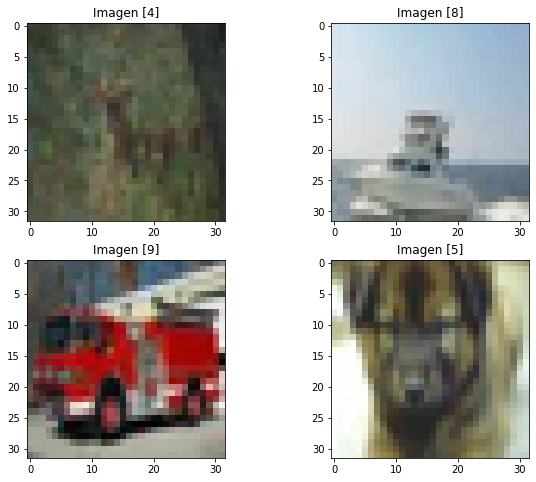

In [6]:
pp.figure(figsize=(10, 8))
pp.subplot(221)
pp.imshow(train_images[10,:,:])
pp.title('Imagen %s' % str(train_labels[10]))

pp.subplot(222)
pp.imshow(train_images[100,:,:])
pp.title('Imagen %s' % str(train_labels[100]))

pp.subplot(223)
pp.imshow(test_images[23,:,:])
pp.title('Imagen %s' % str(test_labels[23]))

pp.subplot(224)
pp.imshow(test_images[33,:,:])
pp.title('Imagen %s' % str(test_labels[33]))


In [7]:
filas, columnas, dimensiones = train_images.shape[1:]
print(filas, ' ', columnas, ' ', dimensiones)

32   32   3


In [8]:
train_data = train_images.reshape(train_images.shape[0], filas, columnas, dimensiones)
test_data = test_images.reshape(test_images.shape[0], filas, columnas, dimensiones)

print('train_data shape = ', train_data.shape)
print('test_data shape = ', test_data.shape)

train_data shape =  (50000, 32, 32, 3)
test_data shape =  (10000, 32, 32, 3)


In [9]:
# Normalizamos los valores de las imágenes entre 0 y 1
train_data = train_data/255
test_data = test_data/255

print(train_data[10,:,:])

[[[0.20784314 0.25490196 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078431 0.17647059 0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078431]
  [0.20784314 0.24313725 0.17647059]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470588 0.18039216 0.17647059]
  [0.15294118 0.16862745 0.16470588]
  [0.10980392 0.1254902  0.12156863]]

 [[0.17647059 0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078431]
  [0.18039216 0.20392157 0.13333333]
  ...
  [0.14901961 0.16470588 0.16078431]
  [0.14117647 0.15686275 0.15294118]
  [0.11372549 0.12941176 0.1254902 ]]

 ...

 [[0.27843137 0.3254902  0.25882353]
  [0.29019608 0.3254902  0.25882353]
  [0.31372549 0.33333333 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941176]
  [0.18039216 0.19215686 0.13333333]
  [0.19215686 0.19607843 0.16078431]]

 [[0.29411765 0.32156863 0.2627451 ]
  [0.30980392 0.33333333 0.27058824]


In [10]:
# Hot Encoding
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print(train_labels_one_hot[27])
print(test_labels_one_hot[27])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Creación de la Red Neuronal Convolucional

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

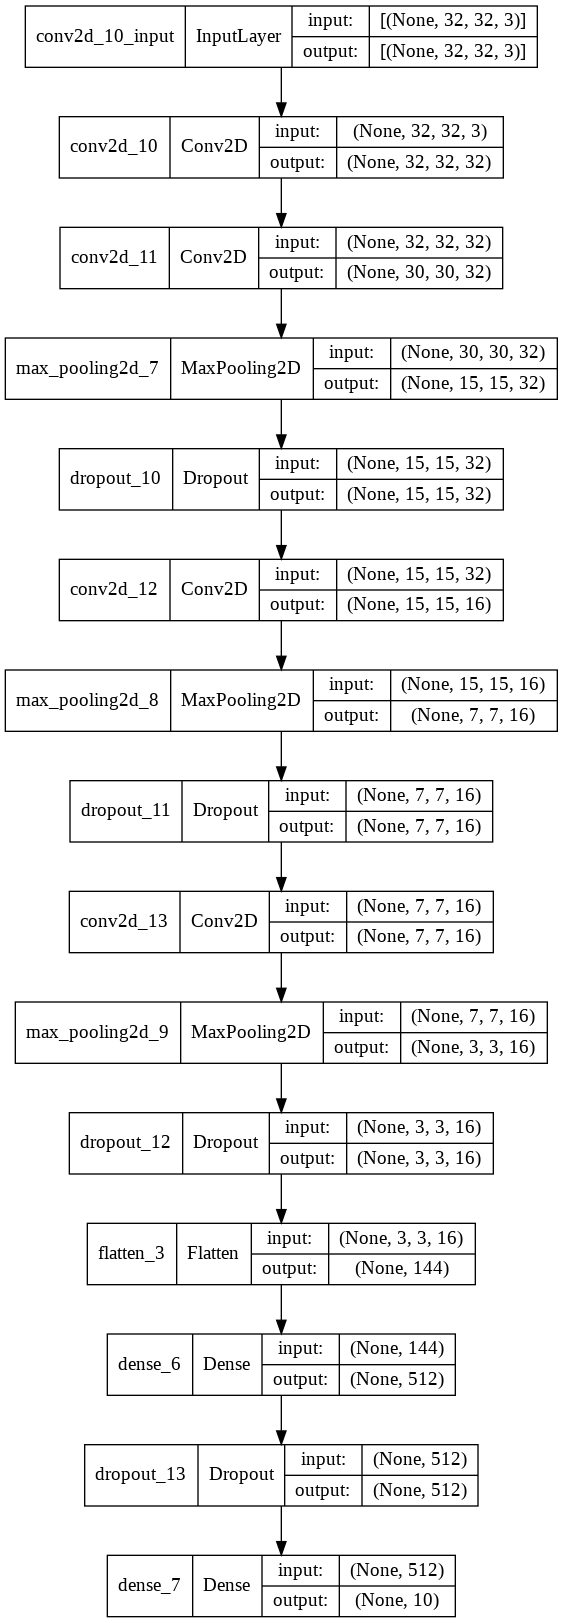

In [25]:
from keras.utils.vis_utils import plot_model

modeloCNN = Sequential()
modeloCNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = (filas, columnas,dimensiones)))
modeloCNN.add(Conv2D(32, (3, 3), activation = 'relu'))
modeloCNN.add(MaxPooling2D(pool_size=(2,2)))
modeloCNN.add(Dropout(0.27))

modeloCNN.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
modeloCNN.add(MaxPooling2D(pool_size=(2,2)))
modeloCNN.add(Dropout(0.27))

modeloCNN.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
modeloCNN.add(MaxPooling2D(pool_size=(2,2)))
modeloCNN.add(Dropout(0.27))


modeloCNN.add(Flatten())
modeloCNN.add(Dense(512, activation = 'relu'))
modeloCNN.add(Dropout(0.27))

modeloCNN.add(Dense(nClasses, activation = 'softmax'))

modeloCNN.summary()
plot_model(modeloCNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor = 'val_loss', patience = 30)

modeloCNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
historial = modeloCNN.fit(train_data, train_labels_one_hot,batch_size=128, epochs = 70, \
                          verbose=1, validation_data=(test_data, test_labels_one_hot), callbacks = [callback])

Epoch 1/70
391/391 [==============================] - 9s 21ms/step - loss: 1.9253 - accuracy: 0.2936 - val_loss: 1.7618 - val_accuracy: 0.3696
Epoch 2/70
391/391 [==============================] - 7s 19ms/step - loss: 1.6272 - accuracy: 0.4093 - val_loss: 1.4623 - val_accuracy: 0.4849
Epoch 3/70
391/391 [==============================] - 7s 19ms/step - loss: 1.5011 - accuracy: 0.4536 - val_loss: 1.4130 - val_accuracy: 0.4970
Epoch 4/70
391/391 [==============================] - 8s 19ms/step - loss: 1.4097 - accuracy: 0.4899 - val_loss: 1.2776 - val_accuracy: 0.5314
Epoch 5/70
391/391 [==============================] - 7s 19ms/step - loss: 1.3415 - accuracy: 0.5147 - val_loss: 1.3107 - val_accuracy: 0.5179
Epoch 6/70
391/391 [==============================] - 8s 20ms/step - loss: 1.2900 - accuracy: 0.5326 - val_loss: 1.1768 - val_accuracy: 0.5834
Epoch 7/70
391/391 [==============================] - 8s 20ms/step - loss: 1.2523 - accuracy: 0.5499 - val_loss: 1.1227 - val_accuracy: 0.5998

In [27]:
modeloCNN.evaluate(test_data, test_labels_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.8083 - accuracy: 0.7159


[0.8083400130271912, 0.7159000039100647]

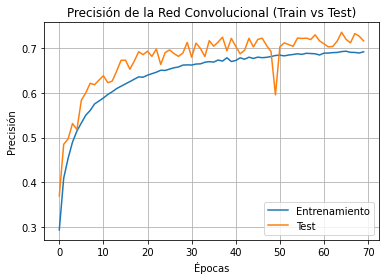

In [28]:
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión de la Red Convolucional (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Entrenamiento', 'Test'], loc='lower right')

pp.grid(True)

pp.show()

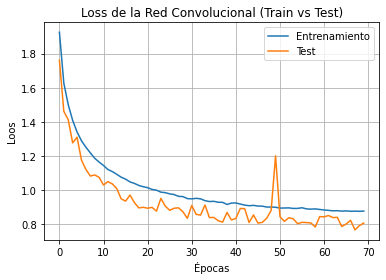

In [29]:
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Loss de la Red Convolucional (Train vs Test)')
pp.ylabel('Loos')
pp.xlabel('Épocas')
pp.legend(['Entrenamiento', 'Test'], loc='upper right')

pp.grid(True)
pp.show()